<a href="https://colab.research.google.com/github/beatricexc/DS-Practice-4/blob/main/DS_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np #linear algebra
import pandas as pd # data processing, CSV files (e.g pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns # visualisation tool 


###3. Cleaning Data

We need to diagnose and clean data before exploring.
Unclean data:

Column name inconsistency like upper
-lower case letter or space between words
- missing data
- different language

We will use head, tail, columns, shape and info methods to diagnose data

In [7]:
data = pd.read_csv('/content/drive/MyDrive/pokemon.csv')
data.head() #returns first 5 rows

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [3]:
data.tail()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
795,796,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
796,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
797,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True
799,800,Volcanion,Fire,Water,80,110,120,130,90,70,6,True


In [ ]:
# columns returns the names of the features
data.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'HP', 'Attack', 'Defense', 'Sp. Atk',
       'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [10]:
data.shape # returns the number of rows and columns in the table

(800, 12)

In [9]:
# info gives data type like dataframe, number of sample or row, number of feature or column, feature types and memory usage
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        799 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB


##EDA

- value_counts(): Frequency counts
- outliers: the value that is considerably higher or lower from rest of the data

In [12]:
# For example lets look frequency of pokemom types
print(data['Type 1'].value_counts(dropna =False))  # if there are nan values that also be counted
# As it can be seen below there are 112 water pokemon or 70 grass pokemon

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Rock         44
Electric     44
Dragon       32
Ground       32
Ghost        32
Dark         31
Poison       28
Steel        27
Fighting     27
Ice          24
Fairy        17
Flying        4
Name: Type 1, dtype: int64


In [13]:
1,2,3,4,200

(1, 2, 3, 4, 200)

In [14]:
# For example max HP is 255 or min defense is 5
data.describe()  #ignore null entries

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.0000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,400.5000,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,231.0844,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.0000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,200.7500,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,400.5000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,600.2500,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,800.0000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


## Visual Exploratory Analysis 
- box plots help with visualising basic statistics like outliers, min/max or quantiles 

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


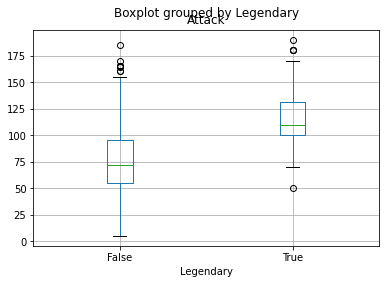

In [15]:
# comparing attack of pokemons that are legendary or not
# Black Line at the top is not
# Blue line at the top is 75%
# Green line is median (50%)
# Blue line at bottom is min
# There are no outliers
data.boxplot(column = 'Attack', by ='Legendary')

## Tidy Data

- melt()

In [16]:
data_new =data.head()
data_new # first 5 rows

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [17]:
# applying melt
# id_vars = what we do not wish to melt
# value_vars = what we want to melt
melted = pd.melt(frame = data_new, id_vars = 'Name', value_vars = ['Attack', 'Defense'])
melted

,Name,variable,value
0,Bulbasaur,Attack,49
1,Ivysaur,Attack,62
2,Venusaur,Attack,82
3,Mega Venusaur,Attack,100
4,Charmander,Attack,52
5,Bulbasaur,Defense,49
6,Ivysaur,Defense,63
7,Venusaur,Defense,83
8,Mega Venusaur,Defense,123
9,Charmander,Defense,43


## Pivoting Data
- reverse of melting

In [18]:
# index is name
melted.pivot(index = 'Name', columns = 'variable', values = 'value')

variable,Attack,Defense
Name,,
Bulbasaur,49,49
Charmander,52,43
Ivysaur,62,63
Mega Venusaur,100,123
Venusaur,82,83


## Concatenating Data 
We can concatenate two dataframes

In [19]:
#First, we create 2 data frames
data1 = data.head()
data2 = data.tail()
conc_data_row = pd.concat([data1, data2], axis = 0, ignore_index = True)#axis 0 adds dataframes in a row
conc_data_row

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
5,796,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
6,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
7,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
8,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True
9,800,Volcanion,Fire,Water,80,110,120,130,90,70,6,True


In [20]:
data1 = data['Attack'].head()
data2 = data['Defense'].head()
conc_data_col = pd.concat([data1, data2], axis = 1) # axis = 1 : adds dataframes in column
conc_data_col

,Attack,Defense
0,49,49
1,62,63
2,82,83
3,100,123
4,52,43
